15. q1 edad  y q15 years using ML /q2 género/ 
¿Cuál es la tendencia para los nuevos empleos?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sidetable
pd.options.display.max_columns = None

In [2]:
# Cargo un df con el csv de datos seleccionados
df = pd.read_csv('data_seleccionada.csv', index_col = 0)
df.head(2)

,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q_41_primary_da_tool,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other
0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,"Local development environments (RStudio, Jupyt...",Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),"Advanced statistical software (SPSS, SAS, etc.)",NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Hacemos un subset con las columnas que interesan
df2 = df[['q_1_age','q_2_gender', 'q_15_years_using_ml']]
df2.head(2)

,q_1_age,q_2_gender,q_15_years_using_ml
0,50-54,Man,5-10 years
1,50-54,Man,< 1 year


In [4]:
# Vemos los valores únicos por si hace falta limpiarlos
df2['q_1_age'].unique()

array(['50-54', '22-24', '45-49', '25-29', '18-21', '30-34', '40-44',
       '35-39', '70+', '55-59', '60-69'], dtype=object)

In [5]:
df2['q_2_gender'].unique()

array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

In [6]:
df2['q_15_years_using_ml'].unique()

array(['5-10 years', '< 1 year', 'I do not use machine learning methods',
       '10-20 years', '2-3 years', nan, '1-2 years', '4-5 years',
       '3-4 years', '20 or more years'], dtype=object)

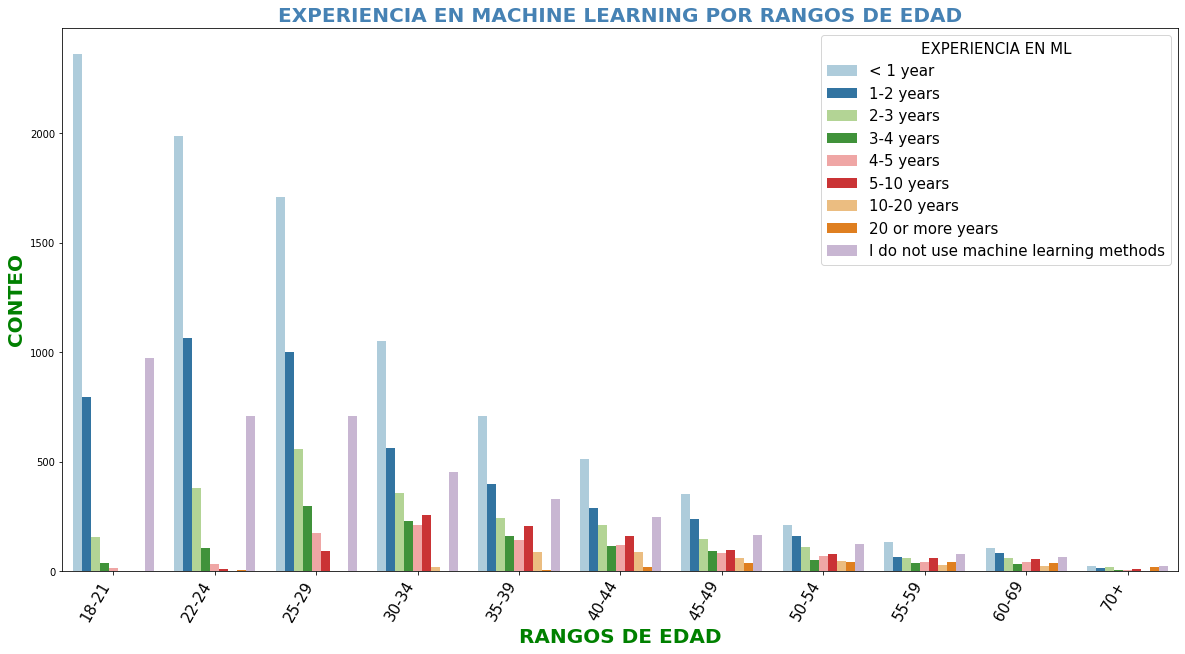

In [7]:
#Gráfica sobre la experiencia en ML por rangos de edad
plt.figure(figsize=(20,10))
fig = sns.countplot(data = df2, x = 'q_1_age', hue = 'q_15_years_using_ml', palette='Paired',
                    order= ['18-21', '22-24','25-29','30-34', '35-39', '40-44','45-49', '50-54', '55-59', '60-69', '70+'],
                    hue_order = ['< 1 year', '1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years', '20 or more years','I do not use machine learning methods'] )
plt.title("EXPERIENCIA EN MACHINE LEARNING POR RANGOS DE EDAD", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('RANGOS DE EDAD', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':15}, loc='upper right')
legend.set_title ("EXPERIENCIA EN ML", prop = {'size': 15})
plt.xticks(rotation=60, horizontalalignment='right', fontsize=15)
#plt.tight_layout()

plt.show(); 

> * Se podría interpretar que la tendencia es que las personas más jóvenes están empezando a formarse en ML, siendo el rango de edad que más diferencia cuantitativa tiene entre los que usan ML y quienes no la usan en absoluto dentro de su grupo de edad.
> * Es posible, además que los grupos de edades de entre 18-30 años sean la muestra más abundante, ya que también es alta la cantidad de gente que no usa metodos ML

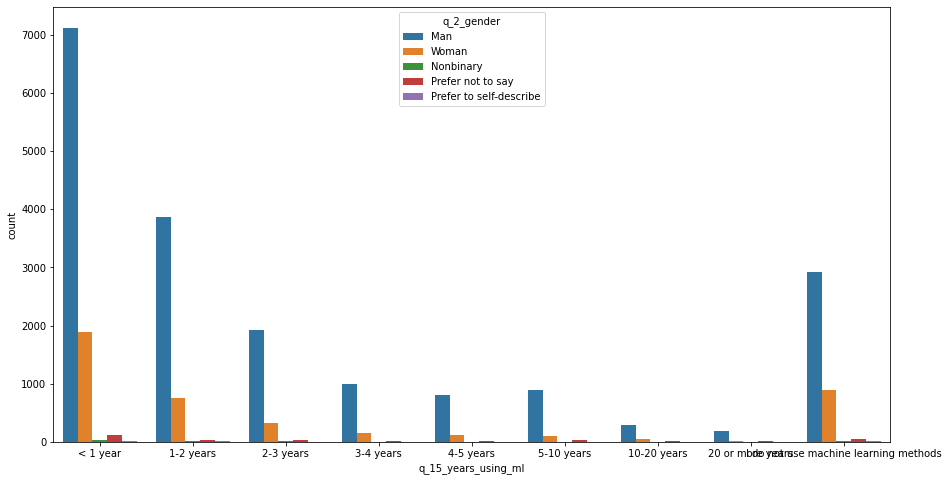

In [8]:
# Gráfica para ver el uso de ml por género
plt.figure(figsize=(15,8))
sns.countplot(x= 'q_15_years_using_ml', data= df2 , hue='q_2_gender', order= ['< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5-10 years','10-20 years','20 or more years','I do not use machine learning methods']);

> * Se ve que lamayoría de personas que se inician en ML son hombres, aunque también hay ujna tendencia en el genero femenino a aprender metodos ML 

In [8]:
# También comprobamos que la mayoria de los datos son de hombres de 25-29 años, están mucho más representados en este estudio
df2.stb.freq(['q_2_gender', 'q_1_age'])

,q_2_gender,q_1_age,count,percent,cumulative_count,cumulative_percent
0,Man,25-29,3859,14.857737,3859,14.857737
1,Man,18-21,3696,14.230162,7555,29.087899
2,Man,22-24,3643,14.026104,11198,43.114003
3,Man,30-34,2765,10.645671,13963,53.759674
4,Man,35-39,1993,7.673353,15956,61.433027
5,Man,40-44,1537,5.917684,17493,67.350710
6,Man,45-49,1171,4.508528,18664,71.859238
7,Woman,18-21,1117,4.300620,19781,76.159858
8,Woman,25-29,994,3.827051,20775,79.986909
9,Woman,22-24,963,3.707696,21738,83.694606


In [9]:
# Vemps las frecuencias entre edad y género
crosstab = pd.crosstab(df2['q_1_age'], df2['q_2_gender'])
crosstab

q_2_gender,Man,Nonbinary,Prefer not to say,Prefer to self-describe,Woman
q_1_age,,,,,
18-21,3696,16,60,12,1117
22-24,3643,13,66,9,963
25-29,3859,12,61,5,994
30-34,2765,17,34,7,618
35-39,1993,7,42,7,455
40-44,1537,4,31,1,317
45-49,1171,4,24,1,175
50-54,811,3,14,0,136
55-59,509,4,7,0,72


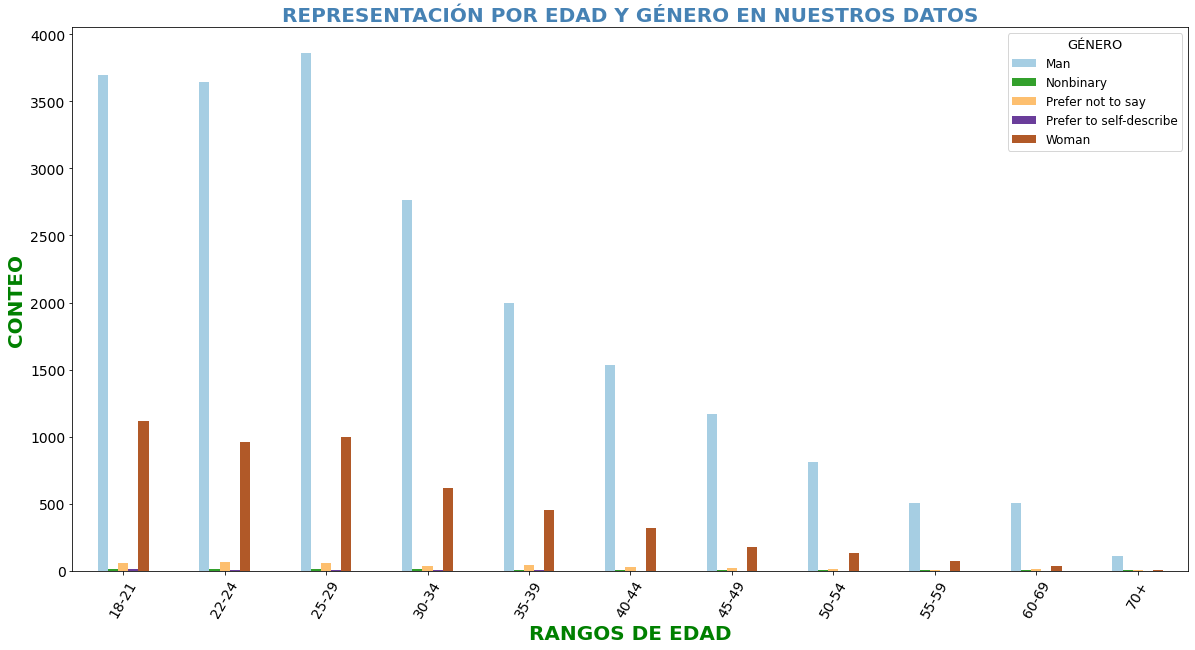

In [10]:
# Gráfica de representación por género y edad
fig, eje = plt.subplots()
crosstab.plot.bar(figsize=(20,10), ax=eje, legend=True, fontsize = 14, rot=60, colormap='Paired')
plt.title("REPRESENTACIÓN POR EDAD Y GÉNERO EN NUESTROS DATOS",fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('RANGOS DE EDAD', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = plt.legend(prop={'size':12}, loc='upper right')
legend.set_title ("GÉNERO", prop = {'size': 13});

#### Comprobacion: Por genero y edad qué experiencia en ML en concreto es la más usual

In [11]:
# Recojo las edades más representadas y selecciono sólo a los hombres
df3 = df2[(df2['q_1_age'].isin(['18-21', '22-24', '25-29','30-34'])) & (df2['q_2_gender']== 'Man')]
df3.head()

,q_1_age,q_2_gender,q_15_years_using_ml
2,22-24,Man,I do not use machine learning methods
7,30-34,Man,2-3 years
8,22-24,Man,< 1 year
9,30-34,Man,< 1 year
14,22-24,Man,< 1 year


In [12]:
# Recojo las edades más representadas y selecciono sólo a las mujeres
df4 = df2[(df2['q_1_age'].isin(['18-21', '22-24', '25-29','30-34'])) & (df2['q_2_gender']== 'Woman')]
df4.head()

,q_1_age,q_2_gender,q_15_years_using_ml
5,25-29,Woman,< 1 year
6,18-21,Woman,< 1 year
11,18-21,Woman,< 1 year
12,18-21,Woman,NaN
21,25-29,Woman,< 1 year


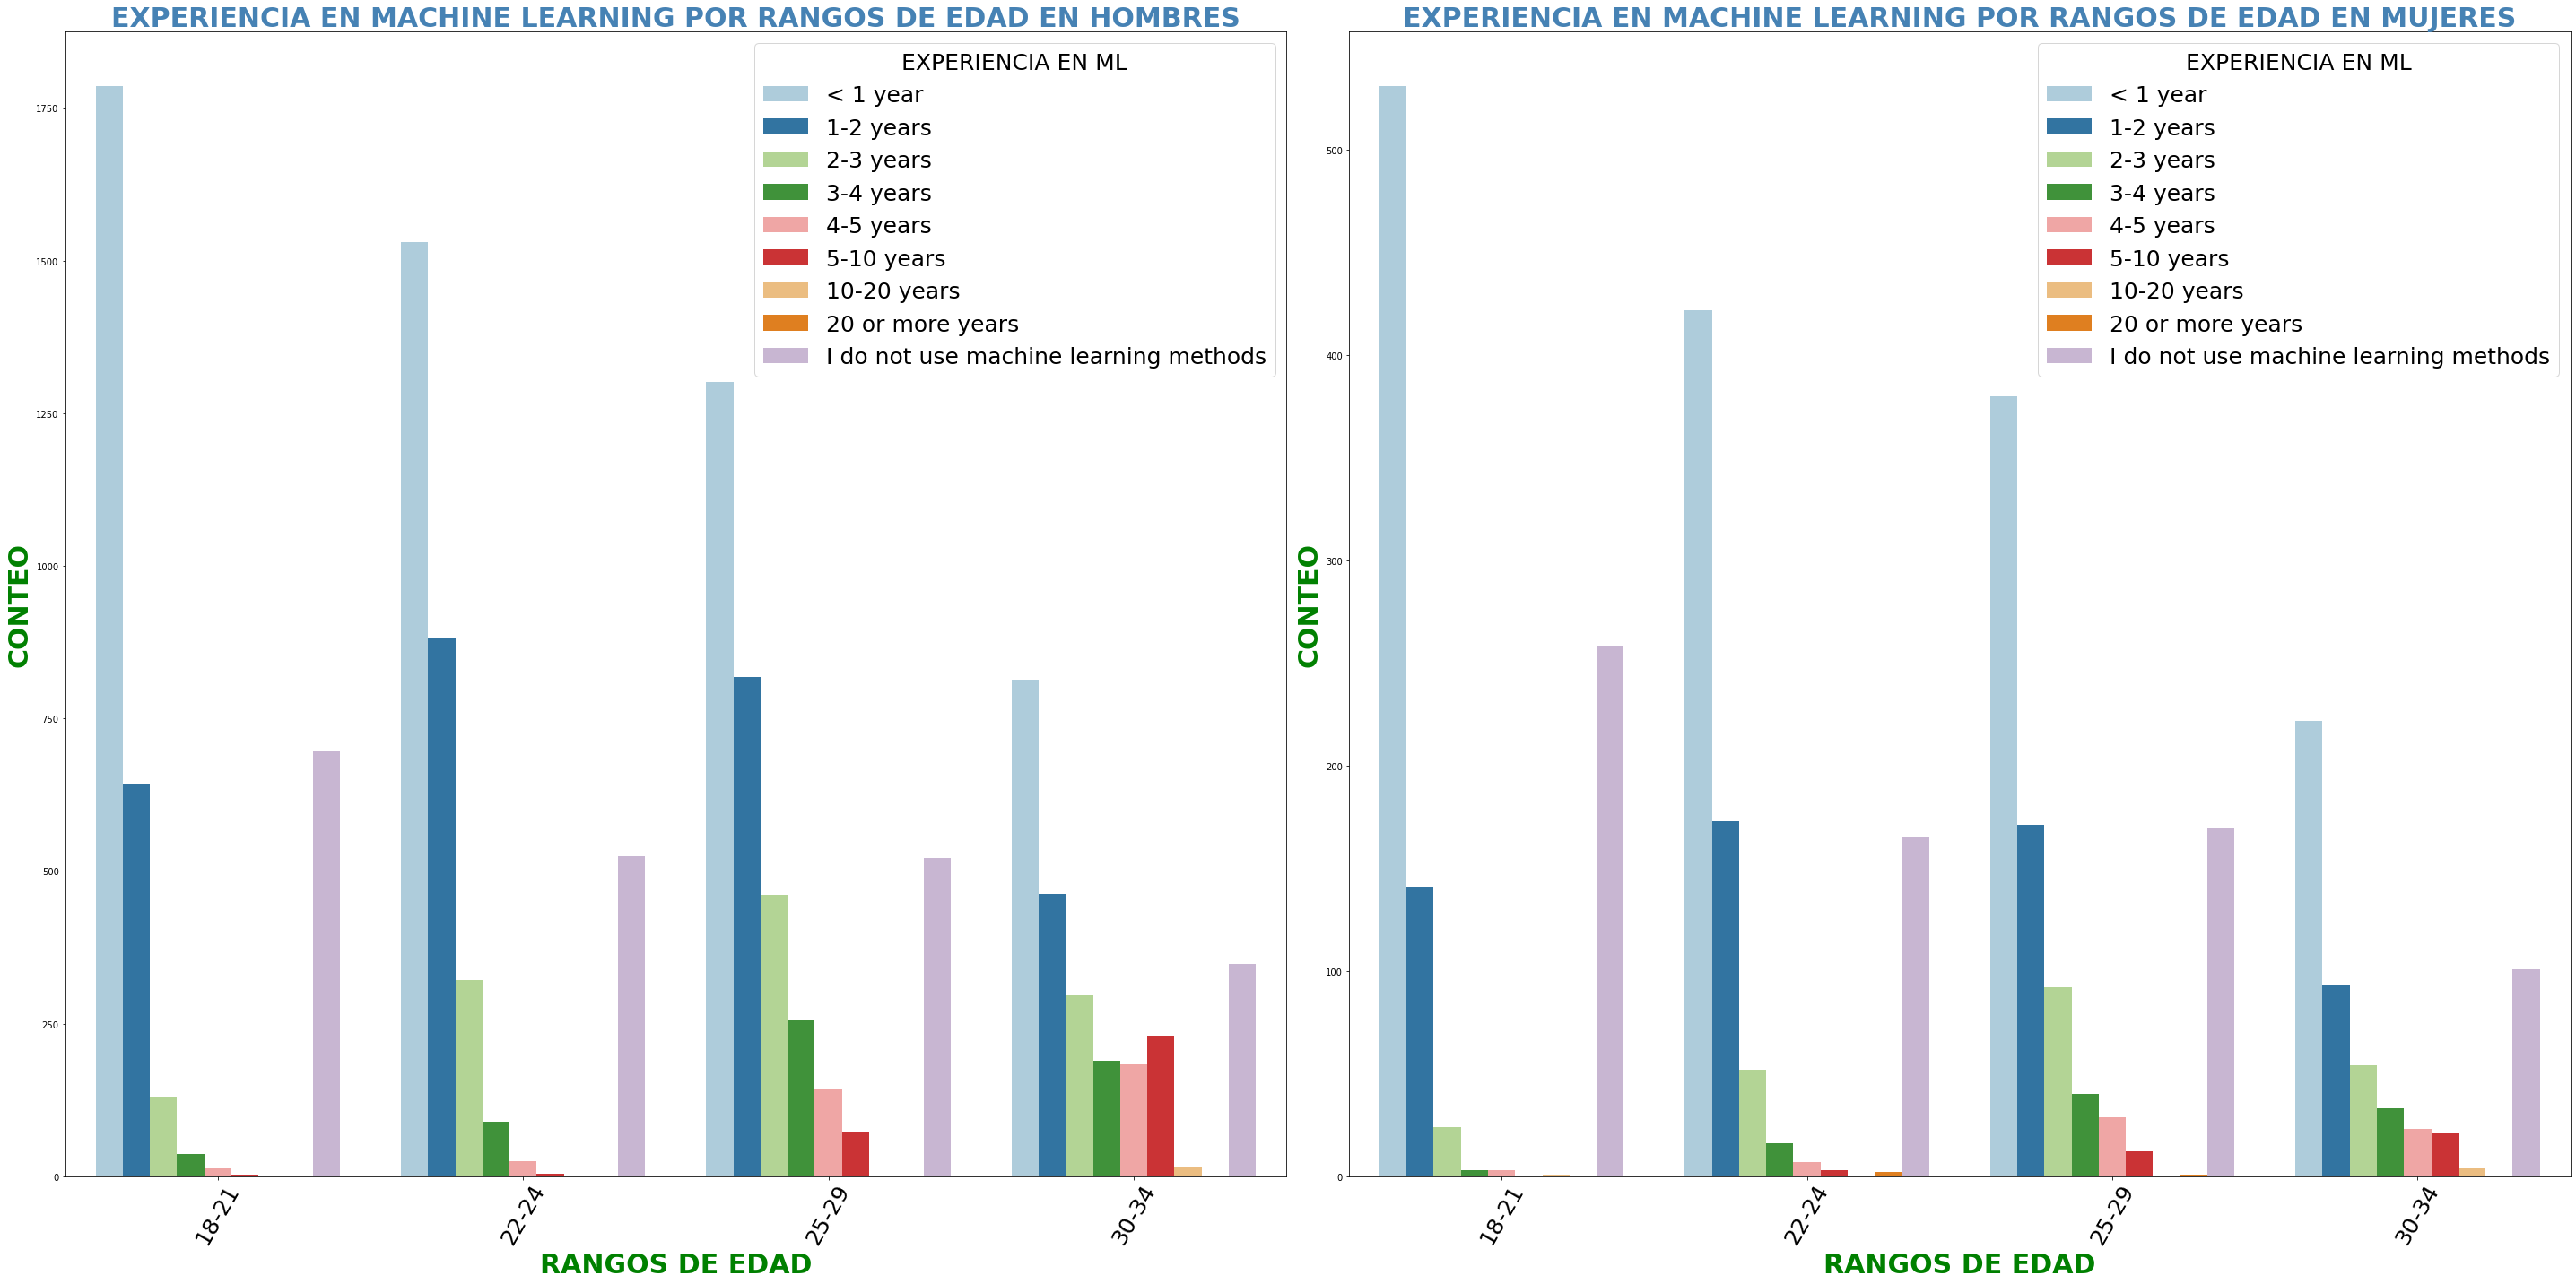

In [13]:
# A graficar!

fig, axes = plt.subplots(1,2, figsize=(40,20))
sns.countplot(data = df3, x = 'q_1_age', hue = 'q_15_years_using_ml', palette='Paired',
                    order= ['18-21', '22-24','25-29','30-34'], ax=axes[0],
                    hue_order = ['< 1 year', '1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years', '20 or more years','I do not use machine learning methods'] )
axes[0].set_title("EXPERIENCIA EN MACHINE LEARNING POR RANGOS DE EDAD EN HOMBRES", fontsize = 30, color = 'Steelblue', fontweight = 'bold')
axes[0].set_xlabel('RANGOS DE EDAD', fontsize = 30, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
axes[0].set_ylabel('CONTEO', fontsize = 30, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = axes[0].legend(prop={'size':25}, loc='upper right')
legend.set_title ("EXPERIENCIA EN ML", prop = {'size': 25})
axes[0].tick_params(axis='x',labelrotation=60, pad=1, labelsize=25)

sns.countplot(data = df4, x = 'q_1_age', hue = 'q_15_years_using_ml', palette='Paired',
                    order= ['18-21', '22-24','25-29','30-34'], ax=axes[1],
                    hue_order = ['< 1 year', '1-2 years','2-3 years','3-4 years','4-5 years','5-10 years','10-20 years', '20 or more years','I do not use machine learning methods'] )
axes[1].set_title("EXPERIENCIA EN MACHINE LEARNING POR RANGOS DE EDAD EN MUJERES", fontsize = 30, color = 'Steelblue', fontweight = 'bold')
axes[1].set_xlabel('RANGOS DE EDAD', fontsize = 30, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
axes[1].set_ylabel('CONTEO', fontsize = 30, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
legend = axes[1].legend(prop={'size':25}, loc='upper right')
legend.set_title ("EXPERIENCIA EN ML", prop = {'size': 25})
axes[1].tick_params(axis='x', labelrotation=60, pad=1, labelsize=25)
plt.tight_layout()

plt.show(); 

> * Vemos que sí hay una tendencia de la gente más joven a usar metodos ML, ya sea hombre o mujer

#### ¿Qué grupos de edad están más representados en este estudio?

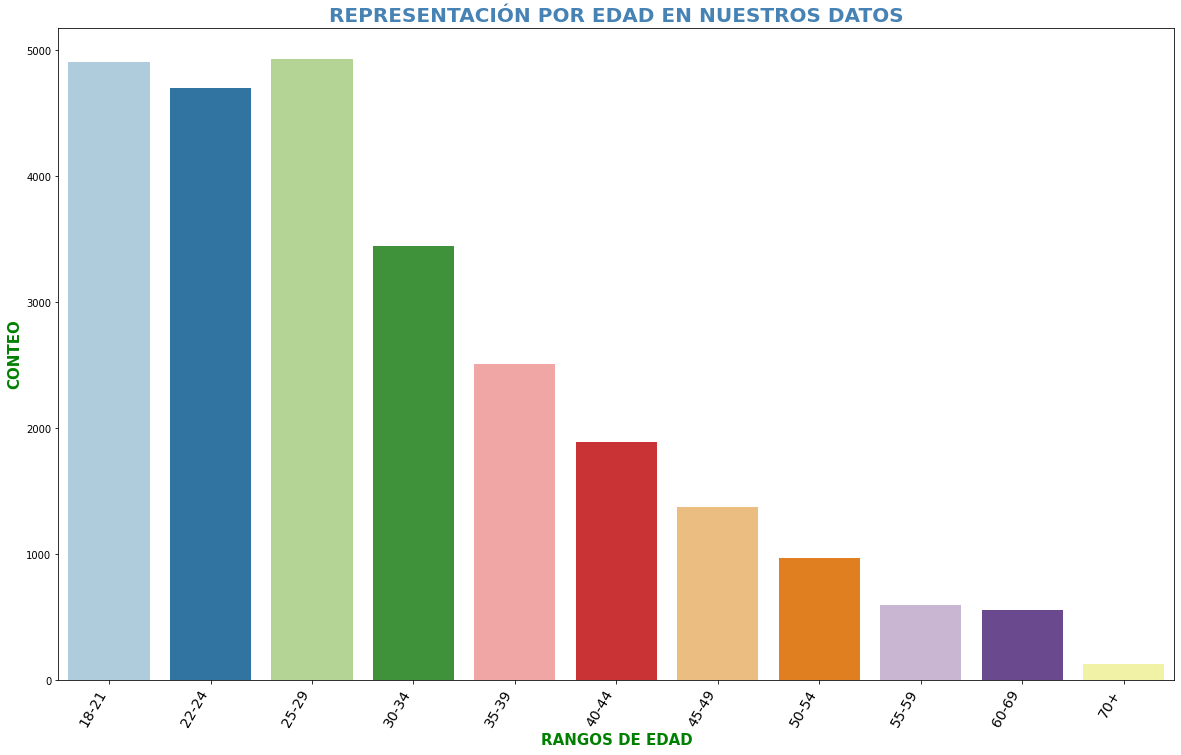

In [14]:
# Gráfica de conteo por grupos de edad
plt.figure(figsize=(20,12))
fig = sns.countplot(data = df2, x = 'q_1_age', palette='Paired',
                    order = ['18-21', '22-24','25-29','30-34', '35-39', '40-44','45-49', '50-54', '55-59', '60-69', '70+'])
plt.title("REPRESENTACIÓN POR EDAD EN NUESTROS DATOS", fontsize = 20, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('RANGOS DE EDAD', fontsize = 15, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.ylabel('CONTEO', fontsize = 15, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'white')
plt.xticks(rotation=60, horizontalalignment='right', fontsize=14)

plt.show(); 

> * Vemos que hay más datos recogidos de las edades menores, por lo que nuestro análisis no se podrá centrar en comparar tanto entre edades, sino dentro de cada grupo.
> * Aún así, se ve la tendencia 

In [17]:
# Lo vemos también de forma numérica y en un piechart
age = df2.groupby('q_1_age').size()
age

q_1_age
18-21    4901
22-24    4694
25-29    4931
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
dtype: int64

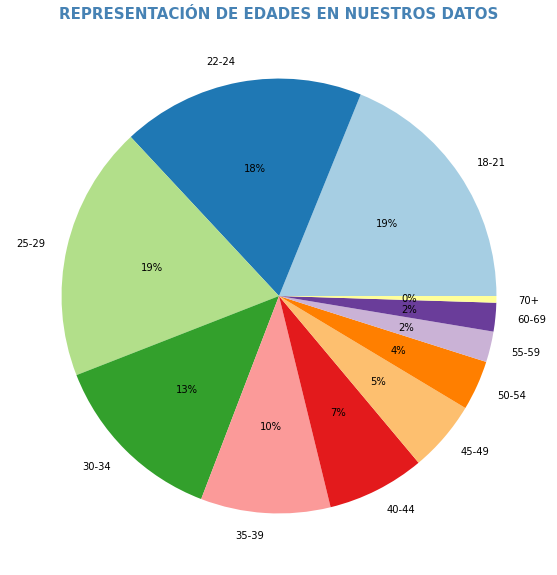

In [18]:
# Piechart de grupos de edad
plt.figure(figsize=(20,10))
colors = sns.color_palette('Paired')
plt.pie(x=age.values, labels = age.index, colors = colors, autopct='%.0f%%')
plt.title('REPRESENTACIÓN DE EDADES EN NUESTROS DATOS', fontsize = 15, color = 'Steelblue', fontweight = 'bold')
plt.show();